<a href="https://colab.research.google.com/github/isratjahanchoity/salary-data-prediction/blob/main/Data_Mining_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
sal_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Salary_Data.csv')
sal_data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [ ]:
print("Dataset shape (row, column):", sal_data.shape)
print("Total Rows:", sal_data.shape[0])
print("Total Columns:", sal_data.shape[1])


Dataset shape (row, column): (6704, 6)
Total Rows: 6704
Total Columns: 6


In [ ]:
print("Column Names:", sal_data.columns.tolist())
print("\nData Types:\n", sal_data.dtypes)


Column Names: ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary']

Data Types:
 Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object


In [ ]:
sal_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [ ]:
print("\nMissing Values in Each Column:\n", sal_data.isnull().sum())



Missing Values in Each Column:
 Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


In [ ]:
sal_data.describe()


,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
print(sal_data.columns)


Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')


In [ ]:
# Correct column name use kore X and y define
X = sal_data[['Years of Experience']]
y = sal_data['Salary']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
print(X_train.isnull().sum())
print(y_train.isnull().sum())


Years of Experience    1
dtype: int64
2


In [ ]:
X_train = X_train.dropna()
y_train = y_train.dropna()


In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (5362, 1)
y_train shape: (5361,)


In [ ]:
# Step 1: Combine into one DataFrame
data = sal_data[['Years of Experience', 'Salary']].dropna()

# Step 2: Split feature and target from cleaned data
X = data[['Years of Experience']]
y = data['Salary']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm shapes again
print(X_train.shape)
print(y_train.shape)

# Model train
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


(5359, 1)
(5359,)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 946833177.7094355
R² Score: 0.6669549610495003


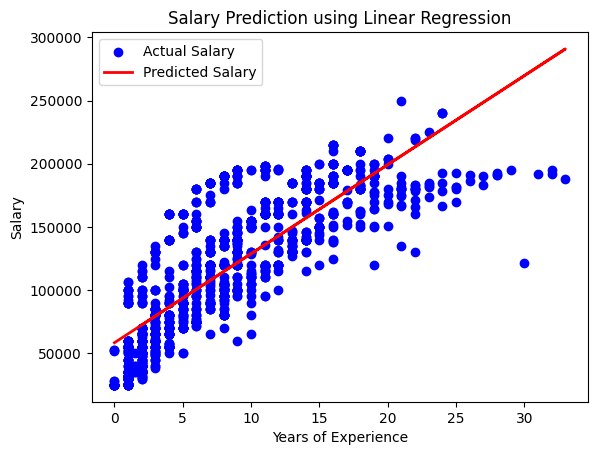

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='Actual Salary')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Salary')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary Prediction using Linear Regression")
plt.legend()
plt.show()


# **Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Create the Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust alpha (regularization strength)

# Fit the model on training data
ridge_model.fit(X_train, y_train)

# Predict on test data
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model performance
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Mean Squared Error:", mse_ridge)
print("Ridge Regression R² Score:", r2_ridge)


Ridge Regression Mean Squared Error: 946833230.8342172
Ridge Regression R² Score: 0.6669549423630563


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit scaler on training data and transform
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

alphas = [0.01, 0.1, 1, 10, 100]
results = []

for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((alpha, mse, r2))
    print(f'Alpha: {alpha} -> MSE: {mse:.2f}, R2: {r2:.4f}')


Alpha: 0.01 -> MSE: 946833197.03, R2: 0.6670
Alpha: 0.1 -> MSE: 946833371.50, R2: 0.6670
Alpha: 1 -> MSE: 946835174.39, R2: 0.6670
Alpha: 10 -> MSE: 946858998.84, R2: 0.6669
Alpha: 100 -> MSE: 947655699.75, R2: 0.6667


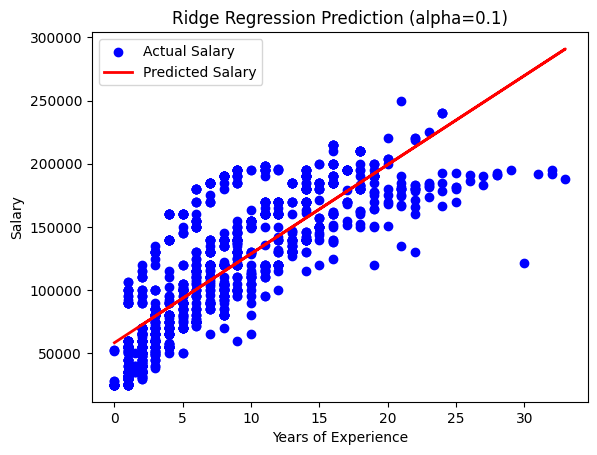

In [ ]:
best_alpha = 0.1
best_model = Ridge(alpha=best_alpha)
best_model.fit(X_train_scaled, y_train)
y_pred_best = best_model.predict(X_test_scaled)

import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='Actual Salary')
plt.plot(X_test, y_pred_best, color='red', linewidth=2, label='Predicted Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title(f'Ridge Regression Prediction (alpha={best_alpha})')
plt.legend()
plt.show()

# **Lasso Regression**

Lasso Regression Mean Squared Error: 946833202.0826547
Lasso Regression R² Score: 0.6669549524763112


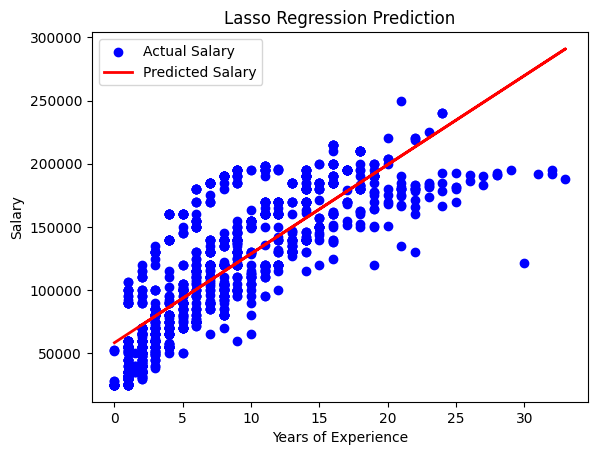

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)

y_pred_lasso = lasso_model.predict(X_test_scaled)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression Mean Squared Error:", mse_lasso)
print("Lasso Regression R² Score:", r2_lasso)

plt.scatter(X_test, y_test, color='blue', label='Actual Salary')
plt.plot(X_test, y_pred_lasso, color='red', linewidth=2, label='Predicted Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Lasso Regression Prediction')
plt.legend()
plt.show()


# **Elastic Net Regression**

Elastic Net Mean Squared Error: 951603241.1652781
Elastic Net R² Score: 0.6652771090193351


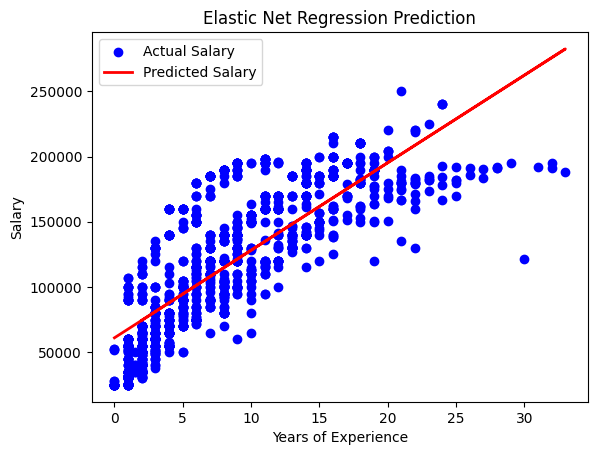

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create Elastic Net model
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio=0.5 means equal mix of Lasso and Ridge

# Train the model
elastic_net_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_enet = elastic_net_model.predict(X_test_scaled)

# Evaluate the model
mse_enet = mean_squared_error(y_test, y_pred_enet)
r2_enet = r2_score(y_test, y_pred_enet)

print("Elastic Net Mean Squared Error:", mse_enet)
print("Elastic Net R² Score:", r2_enet)

# Visualization
plt.scatter(X_test, y_test, color='blue', label='Actual Salary')
plt.plot(X_test, y_pred_enet, color='red', linewidth=2, label='Predicted Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Elastic Net Regression Prediction')
plt.legend()
plt.show()


# **Decision Tree Regression**

Decision Tree Regression Mean Squared Error: 702769813.9620531
Decision Tree Regression R² Score: 0.7528033389889787


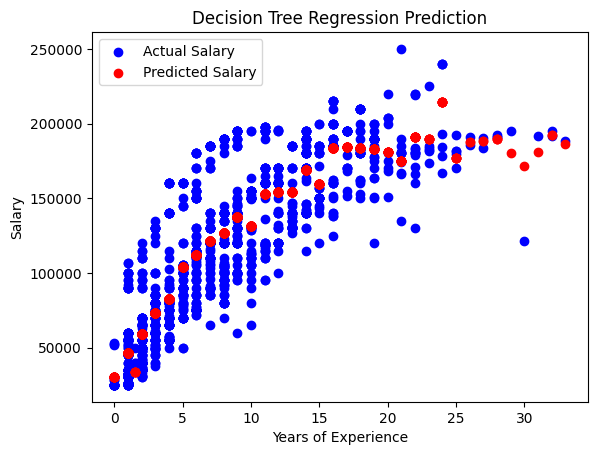

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Create Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Regression Mean Squared Error:", mse_dt)
print("Decision Tree Regression R² Score:", r2_dt)

# Visualization
plt.scatter(X_test, y_test, color='blue', label='Actual Salary')
plt.scatter(X_test, y_pred_dt, color='red', label='Predicted Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Decision Tree Regression Prediction')
plt.legend()
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the model
dt = DecisionTreeRegressor(random_state=42)

# Define hyperparameters grid
param_grid = {
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='r2')

# Fit on training data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on test data using best estimator
best_dt = grid_search.best_estimator_
y_pred_best = best_dt.predict(X_test)

# Evaluate
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print("Tuned Decision Tree MSE:", mse_best)
print("Tuned Decision Tree R2:", r2_best)


Best Hyperparameters: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2}
Tuned Decision Tree MSE: 703807292.7881286
Tuned Decision Tree R2: 0.7524384096812874


# **Random Forest Regression**

Random Forest Regression Mean Squared Error: 703342439.3284246
Random Forest Regression R² Score: 0.7526019201520209


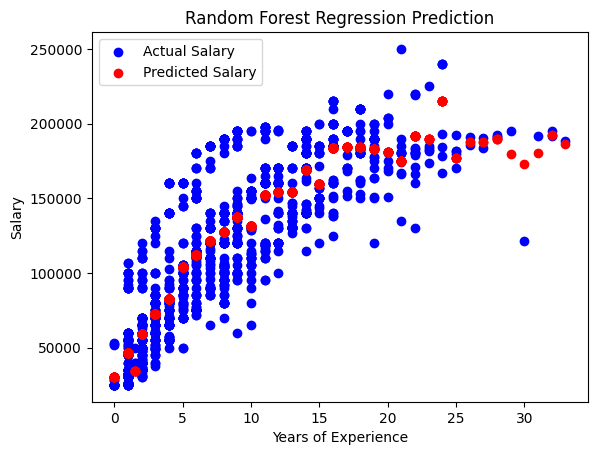

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Create the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Mean Squared Error:", mse_rf)
print("Random Forest Regression R² Score:", r2_rf)

# Visualization
plt.scatter(X_test, y_test, color='blue', label='Actual Salary')
plt.scatter(X_test, y_pred_rf, color='red', label='Predicted Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Random Forest Regression Prediction')
plt.legend()
plt.show()


# **Gradient Boosting Regression**

Gradient Boosting Regression Mean Squared Error: 702052126.4482473
Gradient Boosting Regression R² Score: 0.7530557828952726


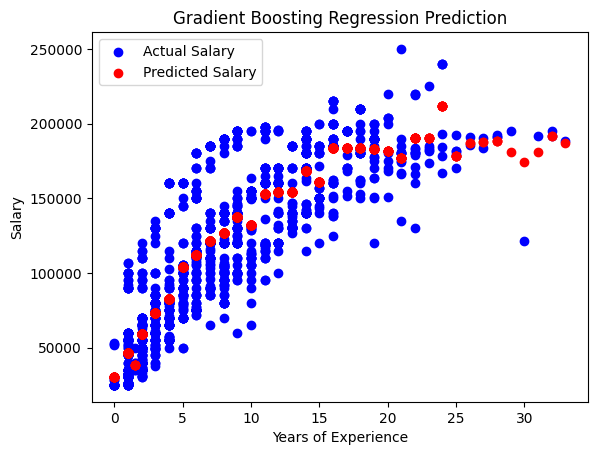

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Create Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1)

# Train the model
gb_model.fit(X_train, y_train)

# Predict on test data
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Regression Mean Squared Error:", mse_gb)
print("Gradient Boosting Regression R² Score:", r2_gb)

# Visualization
plt.scatter(X_test, y_test, color='blue', label='Actual Salary')
plt.scatter(X_test, y_pred_gb, color='red', label='Predicted Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Gradient Boosting Regression Prediction')
plt.legend()
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the model
gb = GradientBoostingRegressor(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5]
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='r2')

# Fit on training data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on test data using best estimator
best_gb = grid_search.best_estimator_
y_pred_best_gb = best_gb.predict(X_test)

# Evaluate
mse_best_gb = mean_squared_error(y_test, y_pred_best_gb)
r2_best_gb = r2_score(y_test, y_pred_best_gb)

print("Tuned Gradient Boosting MSE:", mse_best_gb)
print("Tuned Gradient Boosting R2:", r2_best_gb)


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}
Tuned Gradient Boosting MSE: 702202983.4054952
Tuned Gradient Boosting R2: 0.7530027195231968


# **Support Vector Regression (SVR)**

SVR Mean Squared Error: 879916645.462312
SVR R² Score: 0.6904926016955432


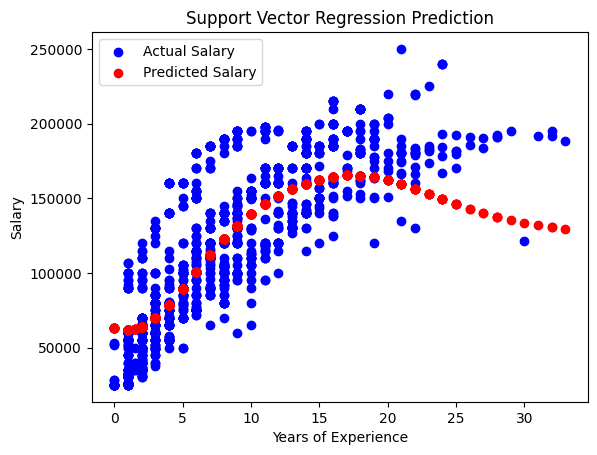

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create SVR model with RBF kernel
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)

# Train the model
svr_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("SVR Mean Squared Error:", mse_svr)
print("SVR R² Score:", r2_svr)

# Visualization
plt.scatter(X_test, y_test, color='blue', label='Actual Salary')
plt.scatter(X_test, y_pred_svr, color='red', label='Predicted Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Support Vector Regression Prediction')
plt.legend()
plt.show()


# **K-Nearest Neighbors (KNN) Regression**

KNN Regression Mean Squared Error: 817532467.8748358
KNN Regression R² Score: 0.7124360034939241


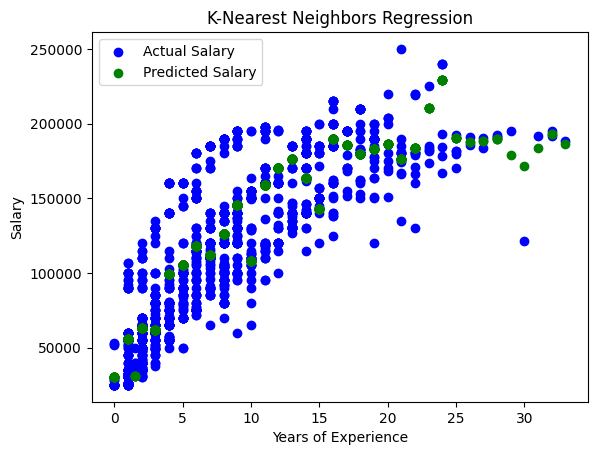

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Scale the data (KNN is sensitive to scale)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Create the KNN regressor model
knn_model = KNeighborsRegressor(n_neighbors=5)

# Step 3: Fit the model on the training data
knn_model.fit(X_train_scaled, y_train)

# Step 4: Predict on the test data
y_pred_knn = knn_model.predict(X_test_scaled)

# Step 5: Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("KNN Regression Mean Squared Error:", mse_knn)
print("KNN Regression R² Score:", r2_knn)

# Step 6: Visualization
plt.scatter(X_test, y_test, color='blue', label='Actual Salary')
plt.scatter(X_test, y_pred_knn, color='green', label='Predicted Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('K-Nearest Neighbors Regression')
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Define the parameter grid
param_grid = {
    'n_neighbors': list(range(1, 21))  # Trying k from 1 to 20
}

# Step 3: Create the KNN model
knn = KNeighborsRegressor()

# Step 4: Apply GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

# Step 5: Get the best model and evaluate
best_knn = grid_search.best_estimator_
y_pred_knn_tuned = best_knn.predict(X_test_scaled)

mse_knn_tuned = mean_squared_error(y_test, y_pred_knn_tuned)
r2_knn_tuned = r2_score(y_test, y_pred_knn_tuned)

print("Best Hyperparameters:", grid_search.best_params_)
print("Tuned KNN MSE:", mse_knn_tuned)
print("Tuned KNN R² Score:", r2_knn_tuned)


Best Hyperparameters: {'n_neighbors': 20}
Tuned KNN MSE: 730658460.2531996
Tuned KNN R² Score: 0.7429936116695564


# **AdaBoost Regression**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the AdaBoost regressor
ada_model = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
ada_model.fit(X_train, y_train)

# Predict on test data
y_pred_ada = ada_model.predict(X_test)

# Evaluate the model
mse_ada = mean_squared_error(y_test, y_pred_ada)
r2_ada = r2_score(y_test, y_pred_ada)

print("AdaBoost Regression Mean Squared Error:", mse_ada)
print("AdaBoost Regression R² Score:", r2_ada)


AdaBoost Regression Mean Squared Error: 755968322.7325952
AdaBoost Regression R² Score: 0.7340909619380861


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0]
}

# Create AdaBoost Regressor
ada = AdaBoostRegressor(random_state=42)

# GridSearchCV for tuning
grid_search_ada = GridSearchCV(estimator=ada, param_grid=param_grid,
                                cv=5, scoring='r2', n_jobs=-1)

# Fit the model
grid_search_ada.fit(X_train, y_train)

# Best model
best_ada_model = grid_search_ada.best_estimator_

# Predict using the best model
y_pred_best_ada = best_ada_model.predict(X_test)

# Evaluate performance
from sklearn.metrics import mean_squared_error, r2_score
mse_best_ada = mean_squared_error(y_test, y_pred_best_ada)
r2_best_ada = r2_score(y_test, y_pred_best_ada)

# Print results
print("Best Hyperparameters:", grid_search_ada.best_params_)
print("Tuned AdaBoost MSE:", mse_best_ada)
print("Tuned AdaBoost R² Score:", r2_best_ada)


Best Hyperparameters: {'learning_rate': 0.01, 'n_estimators': 50}
Tuned AdaBoost MSE: 728267890.1084259
Tuned AdaBoost R² Score: 0.7438344858021108


# **Extra Trees Regression**

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the model
et_model = ExtraTreesRegressor(random_state=42)
et_model.fit(X_train, y_train)

# Predict on the test set
y_pred_et = et_model.predict(X_test)

# Evaluate the model
mse_et = mean_squared_error(y_test, y_pred_et)
r2_et = r2_score(y_test, y_pred_et)

print("Extra Trees Regression Mean Squared Error:", mse_et)
print("Extra Trees Regression R² Score:", r2_et)


Extra Trees Regression Mean Squared Error: 702769813.9620533
Extra Trees Regression R² Score: 0.7528033389889786


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor

# Parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create Extra Trees Regressor
et = ExtraTreesRegressor(random_state=42)

# Setup GridSearchCV
grid_search_et = GridSearchCV(estimator=et, param_grid=param_grid,
                              cv=5, scoring='r2', n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search_et.fit(X_train, y_train)

# Best model from grid search
best_et_model = grid_search_et.best_estimator_

# Predict with best model
y_pred_best_et = best_et_model.predict(X_test)

# Evaluate tuned model
from sklearn.metrics import mean_squared_error, r2_score
mse_best_et = mean_squared_error(y_test, y_pred_best_et)
r2_best_et = r2_score(y_test, y_pred_best_et)

print("Best Hyperparameters:", grid_search_et.best_params_)
print("Tuned Extra Trees MSE:", mse_best_et)
print("Tuned Extra Trees R² Score:", r2_best_et)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Tuned Extra Trees MSE: 702792314.5744927
Tuned Extra Trees R² Score: 0.7527954244824713


# **MLP Regression**

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create MLP Regressor model
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam',
                         max_iter=1000, random_state=42)

# Train the model
mlp_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_mlp = mlp_model.predict(X_test_scaled)

# Evaluate the model
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print("MLP Regression Mean Squared Error:", mse_mlp)
print("MLP Regression R² Score:", r2_mlp)


MLP Regression Mean Squared Error: 4091478641.1702642
MLP Regression R² Score: -0.4391623524538746


# **XGBoost Regression**

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create XGBoost Regressor model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Regression Mean Squared Error:", mse_xgb)
print("XGBoost Regression R² Score:", r2_xgb)


XGBoost Regression Mean Squared Error: 702769800.3085517
XGBoost Regression R² Score: 0.7528033437915469


# **LightGBM Regression**

In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create LightGBM Regressor model
lgb_model = lgb.LGBMRegressor(random_state=42)

# Train the model
lgb_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_lgb = lgb_model.predict(X_test_scaled)

# Evaluate performance
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print("LightGBM Regression Mean Squared Error:", mse_lgb)
print("LightGBM Regression R² Score:", r2_lgb)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37
[LightGBM] [Info] Number of data points in the train set: 5359, number of used features: 1
[LightGBM] [Info] Start training from score 115204.917335
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

# **Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X_train, X_test, y_train, y_test are already defined

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Polynomial Regression Mean Squared Error:", mse)
print("Polynomial Regression R² Score:", r2)


Polynomial Regression Mean Squared Error: 726857249.7211918
Polynomial Regression R² Score: 0.7443306732971963


Based on the R² scores from all the regression models you tested, the two best-performing models are **XGBoost Regression** and **Tuned Extra Trees Regression**. Both models achieved an R² score of approximately **0.7528**, indicating strong predictive power compared to the others. Their Mean Squared Errors (MSE) were also the lowest among all models, making them the most accurate in terms of minimizing prediction error.

In contrast, models like **MLP Regression**, **Polynomial Regression**, and **Linear Regression** showed significantly lower performance. Therefore, XGBoost and Extra Trees (with hyperparameter tuning) are the top two models in your experiments. You can now proceed with further analysis, such as feature importance or model ensembling, to improve or interpret the results.


Top 2-
1.Extra Trees Regression
2.XG Boost Regression

In [ ]:
# Example: Extra Trees Regressor train and predict
from sklearn.ensemble import ExtraTreesRegressor

# Model initialize and train (tune parameters jodi thake adjust koro)
etr_best = ExtraTreesRegressor(n_estimators=100, random_state=42)
etr_best.fit(X_train, y_train)

# Prediction
y_pred_etr_best = etr_best.predict(X_test)

# Example: XGBoost Regressor train and predict
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)


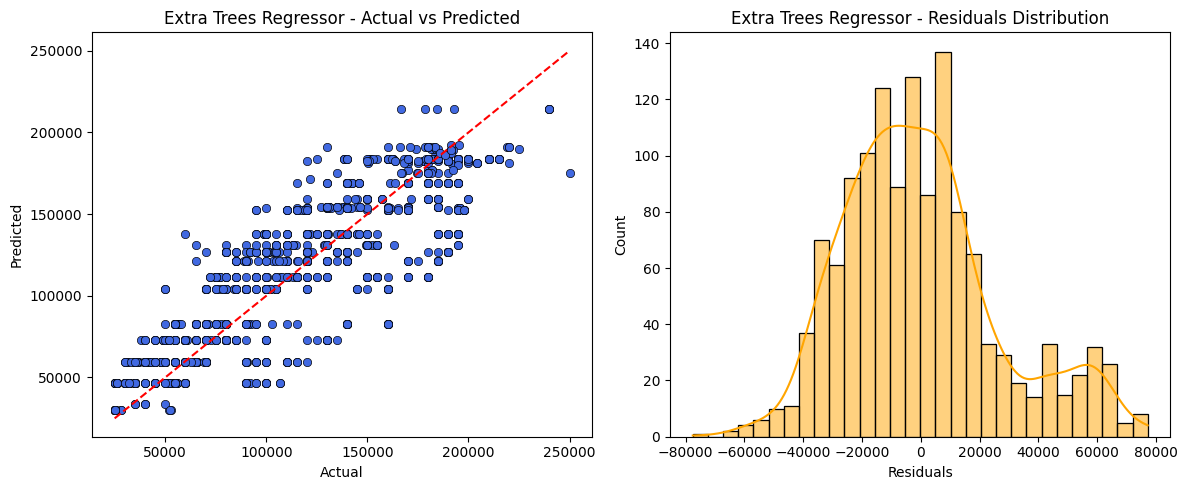

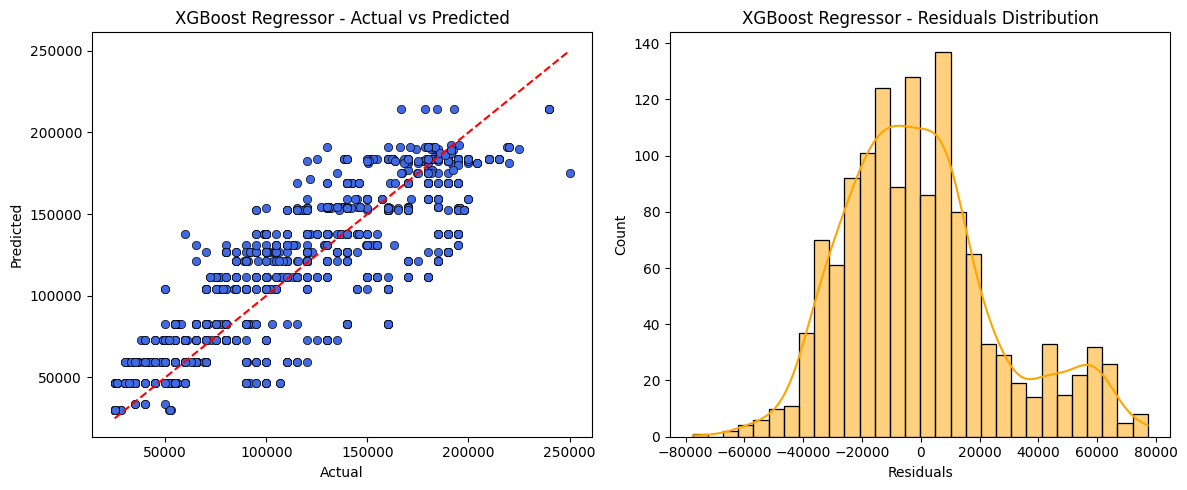

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# Function to plot Actual vs Predicted and Residuals
def plot_model_performance(y_test, y_pred, model_name):
    residuals = y_test - y_pred

    plt.figure(figsize=(12, 5))

    # Actual vs Predicted
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=y_test, y=y_pred, color='royalblue', edgecolor='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{model_name} - Actual vs Predicted")

    # Residuals Plot
    plt.subplot(1, 2, 2)
    sns.histplot(residuals, bins=30, kde=True, color='orange')
    plt.xlabel("Residuals")
    plt.title(f"{model_name} - Residuals Distribution")

    plt.tight_layout()
    plt.show()

# Plot for Tuned Extra Trees Regressor
plot_model_performance(y_test, y_pred_etr_best, "Extra Trees Regressor")

# Plot for XGBoost Regressor
plot_model_performance(y_test, y_pred_xgb, "XGBoost Regressor")
